In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv')
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [3]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [4]:
df.shape

(6029, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            6029 non-null   object
 1   state           6029 non-null   object
 2   district        6029 non-null   object
 3   pincode         6029 non-null   int64 
 4   age_0_5         6029 non-null   int64 
 5   age_5_17        6029 non-null   int64 
 6   age_18_greater  6029 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 329.8+ KB


In [6]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,6029.000000,6029.000000,6029.000000,6029.000000
mean,518765.547023,3.606734,3.493448,0.096533
std,193308.752319,6.055847,6.694502,0.479475
min,110003.000000,0.000000,0.000000,0.000000
25%,380022.000000,1.000000,0.000000,0.000000
50%,518005.000000,2.000000,1.000000,0.000000
75%,685595.000000,4.000000,3.000000,0.000000
max,855116.000000,102.000000,89.000000,9.000000


In [7]:
df = df.drop_duplicates(subset=["date", "pincode"], keep="first")

In [8]:
df.shape

(5743, 7)

In [9]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['Date']=df['date'].dt.day
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year

C:\Users\Mahi\AppData\Local\Temp\ipykernel_8616\3791454672.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df['date'],errors='coerce')


In [10]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,Date,Month,Year
0,2025-12-31,Karnataka,Bidar,585330,2,3,0,31,12,2025
1,2025-12-31,Karnataka,Bidar,585402,6,0,0,31,12,2025
2,2025-12-31,Karnataka,Bidar,585413,1,0,0,31,12,2025
3,2025-12-31,Karnataka,Bidar,585418,1,2,0,31,12,2025
4,2025-12-31,Karnataka,Bidar,585421,4,3,0,31,12,2025


In [11]:
df.drop('date',axis=1,inplace=True)

In [12]:
df.head()

,state,district,pincode,age_0_5,age_5_17,age_18_greater,Date,Month,Year
0,Karnataka,Bidar,585330,2,3,0,31,12,2025
1,Karnataka,Bidar,585402,6,0,0,31,12,2025
2,Karnataka,Bidar,585413,1,0,0,31,12,2025
3,Karnataka,Bidar,585418,1,2,0,31,12,2025
4,Karnataka,Bidar,585421,4,3,0,31,12,2025


In [13]:
df['state'].unique()

array(['Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Pondicherry'], dtype=object)

In [14]:
df['state_clean'] = df['state'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)


In [34]:
df['state_clean'].unique()

array(['karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhyapradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'orissa', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamilnadu', 'telangana', 'tripura', 'uttarpradesh', 'uttarakhand',
       'westbengal', 'andhrapradesh', 'arunachalpradesh', 'assam',
       'bihar', 'chandigarh', 'chhattisgarh', 'damananddiu', 'delhi',
       'goa', 'gujarat', 'haryana', 'himachalpradesh', 'jammuandkashmir',
       'jharkhand', 'pondicherry'], dtype=object)

In [16]:
df['state_final'] = df['state_clean'].replace({
    "orissa": "odisha",
    "pondicherry": "puducherry",
    "andamannicobarislands": "andamanandnicobarislands",
    "damananddiu": "dadraandnagarhavelianddamananddiu",
    "damandiu": "dadraandnagarhavelianddamananddiu",
    "dadraandnagarhaveli": "dadraandnagarhavelianddamananddiu",
    "dadranagarhaveli": "dadraandnagarhavelianddamananddiu"
})
df['state_final'].value_counts()


state_final
uttarpradesh                         691
tamilnadu                            650
maharashtra                          519
westbengal                           480
karnataka                            409
rajasthan                            403
kerala                               378
madhyapradesh                        353
odisha                               308
telangana                            258
andhrapradesh                        223
gujarat                              181
bihar                                169
assam                                114
jharkhand                             93
punjab                                92
chhattisgarh                          71
uttarakhand                           68
haryana                               55
himachalpradesh                       45
jammuandkashmir                       37
tripura                               29
meghalaya                             25
manipur                               21
pudu

In [17]:
df['state_final'].nunique()

35

In [18]:
df['state_final']

0        karnataka
1        karnataka
2        karnataka
3        karnataka
4        karnataka
           ...    
6020    westbengal
6021    westbengal
6022    westbengal
6023    westbengal
6026    westbengal
Name: state_final, Length: 5743, dtype: object

In [19]:
df.groupby('pincode')['state'].nunique().max()

np.int64(1)

In [20]:
bad_pincodes = df.groupby('pincode')['state'].nunique()
bad_pincodes = bad_pincodes[bad_pincodes > 1]
bad_pincodes

Series([], Name: state, dtype: int64)

In [21]:
df[df['pincode'].isin(bad_pincodes.index)][['pincode', 'state']].sort_values('pincode')

,pincode,state


In [22]:
df['enrolments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

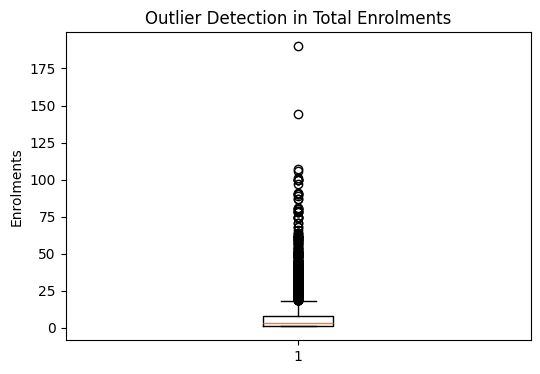

In [23]:
plt.figure(figsize=(6,4))
plt.boxplot(df['enrolments'])
plt.title("Outlier Detection in Total Enrolments")
plt.ylabel("Enrolments")
plt.show()


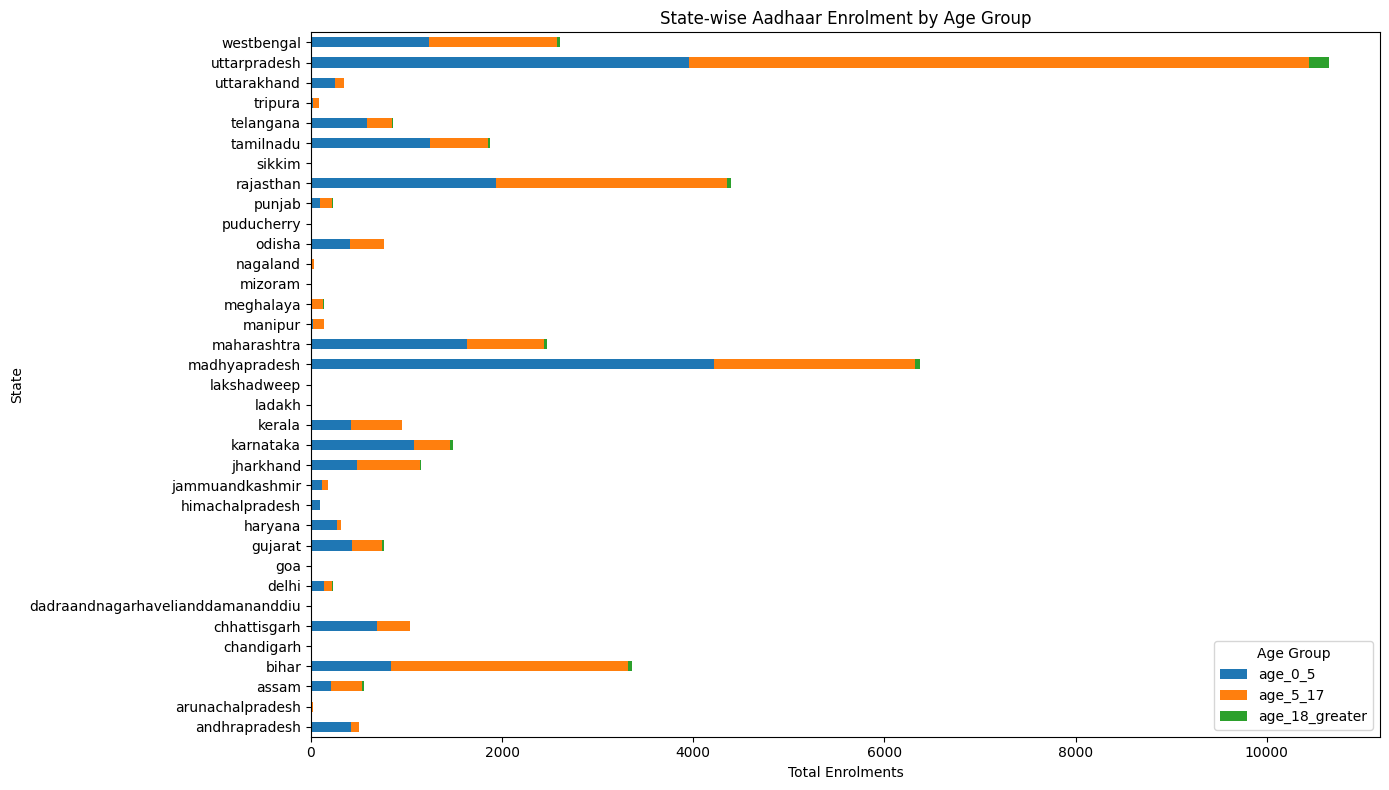

In [24]:
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

state_age = df.groupby('state_final')[age_cols].sum()

state_age.plot(
    kind='barh',
    stacked=True,
    figsize=(14,8)
)

plt.title("State-wise Aadhaar Enrolment by Age Group")
plt.ylabel("State")
plt.xlabel("Total Enrolments")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


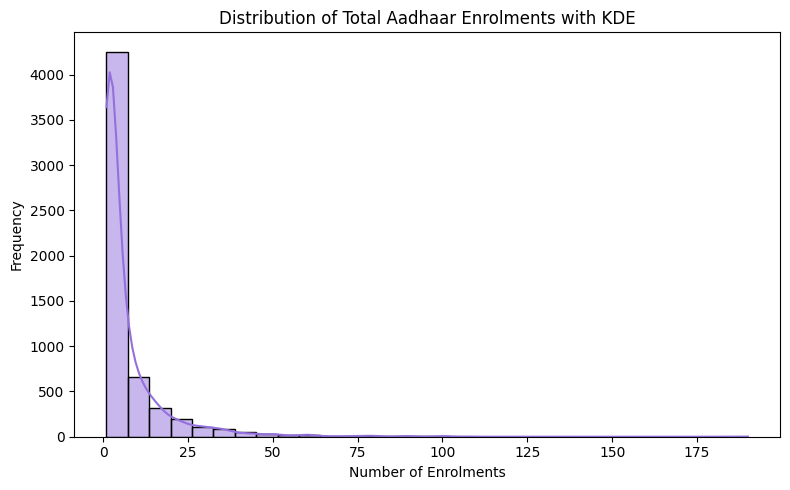

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(
    df['enrolments'],
    bins=30,
    kde=True,
    color="mediumpurple"
)

plt.title("Distribution of Total Aadhaar Enrolments with KDE")
plt.xlabel("Number of Enrolments")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


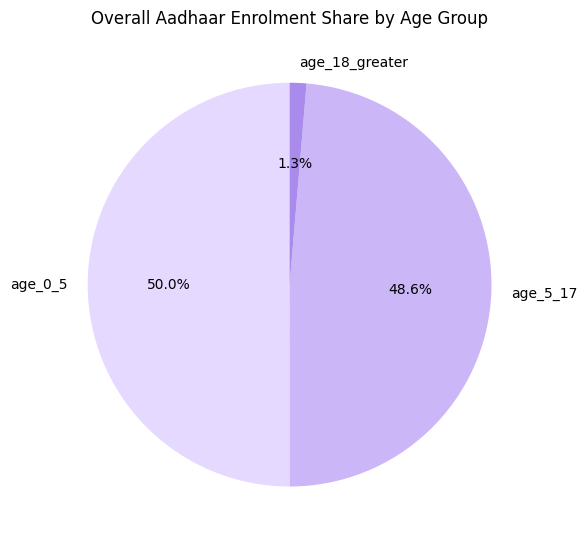

In [26]:
colours = ["#E6D9FF", "#CBB6F7", "#A88BEB"] 
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

age_distribution = df[age_cols].sum()

plt.figure(figsize=(6,6))
plt.pie(
    age_distribution.values,
    labels=age_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colours
)

plt.title("Overall Aadhaar Enrolment Share by Age Group")
plt.tight_layout()
plt.show()

In [27]:
state_enrol = (
    df.groupby('state_final')['enrolments']
    .sum()
    .sort_values(ascending=False)
)

top_states = state_enrol.head(10)

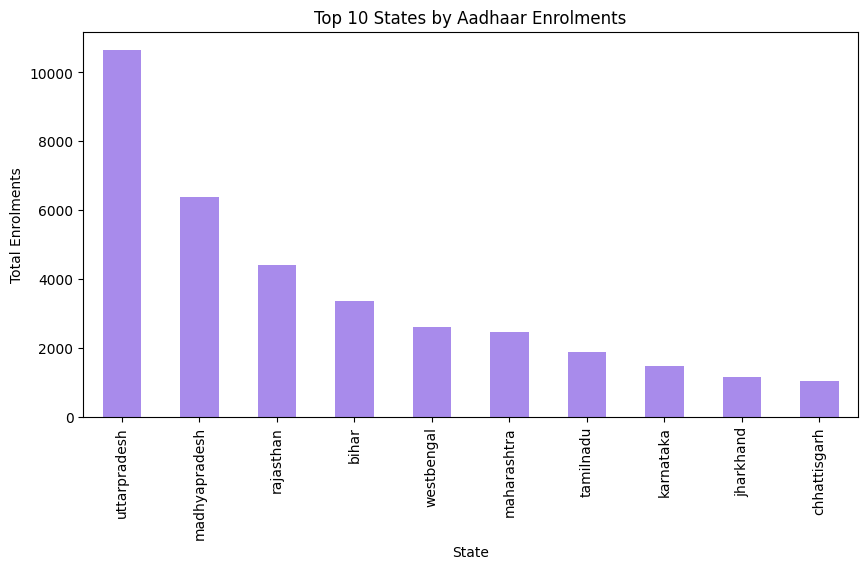

In [28]:
top_states.plot(kind='bar', figsize=(10,5),color="#A88BEB")
plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.show()


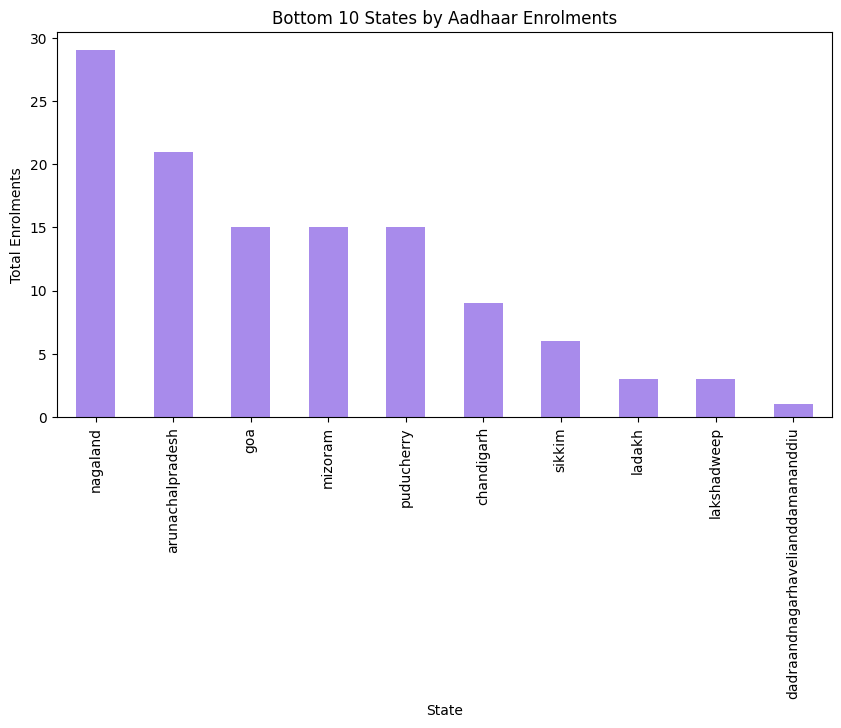

In [29]:
bottom_states = state_enrol.tail(10)

bottom_states.plot(kind='bar', figsize=(10,5),color="#A88BEB")
plt.title("Bottom 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.show()

In [30]:
dist_enrol = (
    df.groupby('district')['enrolments']
    .sum()
    .sort_values(ascending=False)
)

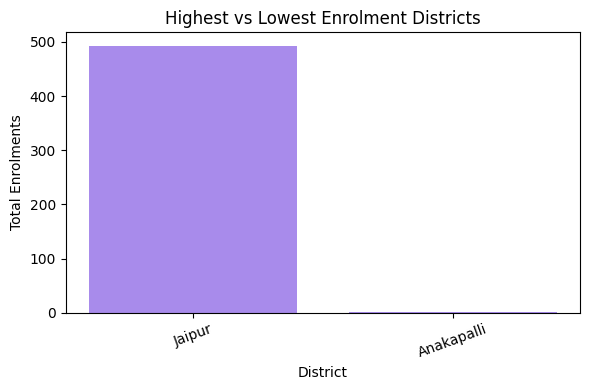

In [31]:
extreme_districts = pd.concat([
    dist_enrol.head(1),
    dist_enrol.tail(1)
])

plt.figure(figsize=(6,4))
plt.bar(extreme_districts.index, extreme_districts.values,color="#A88BEB")

plt.title("Highest vs Lowest Enrolment Districts")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



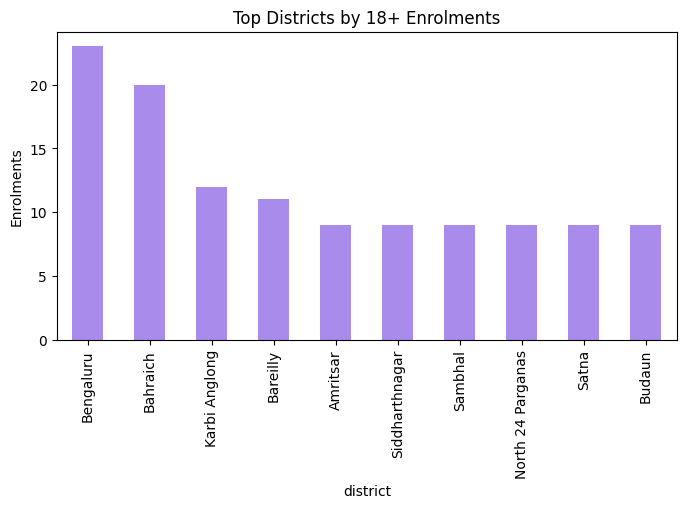

In [32]:
adult_district = df.groupby('district')['age_18_greater'].sum().sort_values(ascending=False).head(10)

adult_district.plot(kind='bar', figsize=(8,4),color="#A88BEB")
plt.title("Top Districts by 18+ Enrolments")
plt.ylabel("Enrolments")
plt.show()


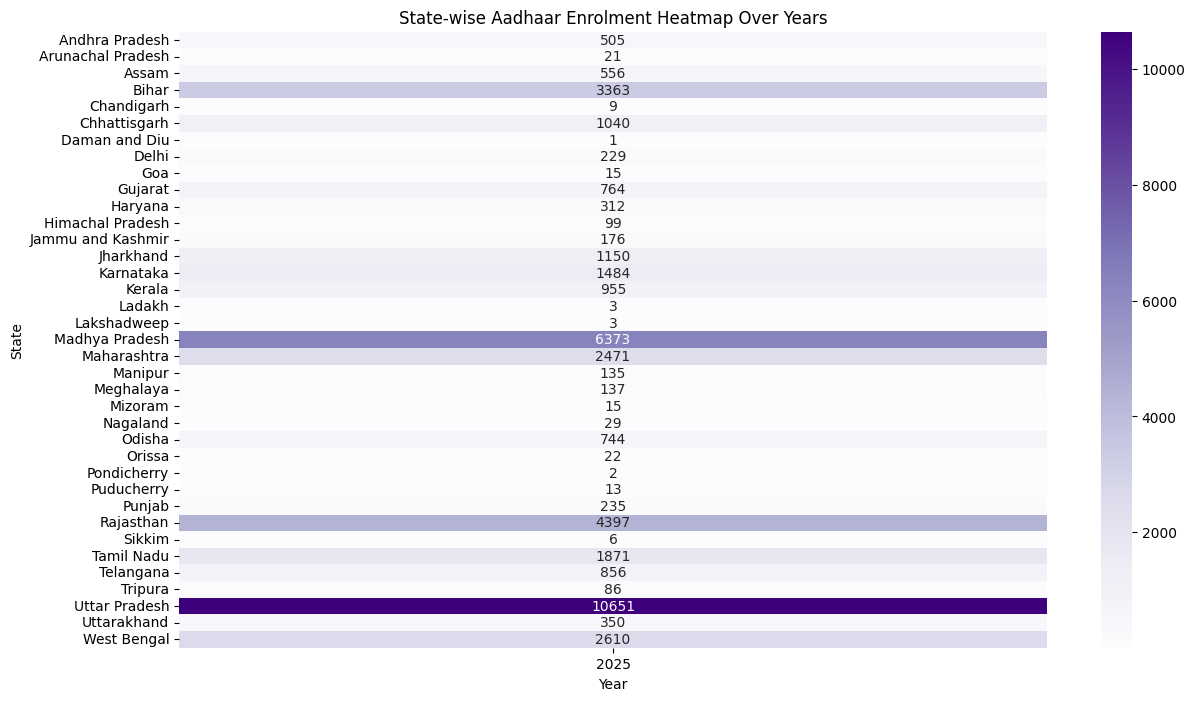

In [33]:
pivot = df.pivot_table(
    values='enrolments',
    index='state',
    columns='Year',
    aggfunc='sum'
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='Purples',annot=True,fmt='.0f')

plt.title("State-wise Aadhaar Enrolment Heatmap Over Years")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()